<a href="https://colab.research.google.com/github/saheedniyi02/sport_plots_template/blob/main/FPL_predictions_barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install highlight-text

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from urllib.error import HTTPError
import os
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
#from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.pyplot as plt

In [ ]:
font_path = "/content/drive/MyDrive/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

#plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [ ]:
unavailable=["Ivan Toney","João Cancelo","Kevin De Bruyne","Reece James","Aleksandar Mitrović","Ivan Perišić","Bernardo Veiga de Carvalho e Silva","Lyle Foster","Aaron Wan-Bissaka","Rico Henry","Jadon Sancho","Antony Matheus dos Santos"]

In [ ]:
player_images={
                #Forwards
               "Erling Haaland":"737066.png",
               "Harry Kane":"194165.png",
               "Aleksandar Mitrović":"351860.png",
               "Gabriel Fernando de Jesus":"576165.png",
               "Ivan Toney":"408987.png",
               "Dominic Solanke":"591734.png",
               "Ollie Watkins":"540088.png",
               "Callum Wilson":"184321.png",
               "Julián Álvarez":"974753.png",
               "Darwin Núñez Ribeiro":"950561.png",
               "Alexander Isak":"690107.png",
               "Cody Gakpo":"806552.png",
               "Taiwo Awoniyi":"643717.png",
               "Odsonne Edouard":"637746.png",
               "Neal Maupay":"391064.png",
               "Yoane Wissa":"666857.png",
               "Eddie Nketiah":"860920.png",
               "Nicolas Jackson":"1197347.png",
               "Carlton Morris":"562725.png",
               "Matheus Santos Carneiro Da Cunha":"863098.png",
               "Fábio Silva":"1050158.png",
               "Michail Antonio":"158545.png",
                "Jhon Durán":"1088066.png",
                "Bénie Traoré":"1231770.png",
                "Callum Wilson":"184321.png",
                "João Pedro Junqueira de Jesus":"1021382.png",
                "Rasmus Højlund":"1199272.png",
                "Anthony Martial":"413557.png",
                 "Oliver McBurnie":"509151.png",
               "Gabriel Fernando de Jesus":"576165.png",
               "Chris Wood":"169719.png",
               "Zeki Amdouni":"1067168.png",
               "Lyle Foster":"881500.png",
                "Raúl Jiménez":"292313.png",
                "Norberto Bercique Gomes Betuncal":"1079485.png",
                "Danny Welbeck":"113836.png",

               #Midfielders
               "Mohamed Salah":"292462.png",
               "Kevin De Bruyne":"169200.png",
               "Bruno Borges Fernandes":"422685.png",
               "Bukayo Saka":"961995.png",
               "Martin Ødegaard":"534670.png",
               "Gabriel Martinelli Silva":"1021586.png",
               "Solly March":"416850.png",
               "Pascal Groß":"167008.png",
               "Phil Foden":"815006.png",
               "Kaoru Mitoma":"862608.png",
               "Eberechi Eze":"818975.png",
               "Jarrod Bowen":"523825.png",
               "Son Heung-min":"212867.png",
               "Marcus Rashford":"696365.png",
               "Kai Havertz":"749736.png",
               "Jordan Ayew":"154280.png",
               "Declan Rice":"654096.png",
               "Raheem Sterling":"246575.png",
               "Bryan Mbeumo":"923312.png",
               "Moisés Caicedo Corozo":"1137668.png",
               "Carney Chukwuemeka":"1089685.png",
               "Mykhailo Mudryk":"976506.png",
               "Enzo Fernández":"1137705.png",
               "Richarlison de Andrade":"654908.png",
               "Pape Matar Sarr":"1107280.png",
               "Dejan Kulusevski":"935379.png",
               "James Maddison":"493165.png",
               "Bobby De Cordova-Reid":"262550.png",
               "Harry Wilson":"494417.png",
               "Leandro Trossard":"318615.png",
               "Mathias Jensen":"650616.png",
                "Jack Harrison":"751649.png",
                "Hwang Hee-chan":"620026.png",
                "Pedro Lomba Neto":"843040.png",
                "Abdoulaye Doucouré":"352887.png",
                "Alex Iwobi":"604785.png",
                "Jadon Sancho":"846381.png",
                "Alejandro Garnacho":"1203665.png",
                "Morgan Gibbs-White":"789502.png",
                "Mason Mount":"750032.png",
                "Carlos Henrique Casimiro":"208494.png",
                "Antony Matheus dos Santos":"967622.png",
                "Solly March":"416850.png",
                "Julio Enciso":"1073742.png",
                "James Ward-Prowse":"279490.png",
                "Lucas Tolentino Coelho de Lima":"766435.png",
                "Simon Adingra":"1227012.png",
                "Saïd Benrahma":"491883.png",
                "Moussa Diaby":"923498.png",
                "Leon Bailey":"671331.png",
                "John McGinn":"356406.png",
                "Douglas Luiz Soares de Paulo":"787350.png",
                "Mateo Kovačić":"239219.png",
                "Bernardo Veiga de Carvalho e Silva":"488139.png",
                "Jack Grealish":"312765.png",
                "Rodrigo Hernandez":"675088.png",
                "Conor Gallagher":"96027.png",
                "Anthony Gordon":"906937.png",
                "Dominik Szoboszlai":"846005.png",
                "Miguel Almirón Rejala":"442277.png",
                "Harvey Barnes":"760359.png",
                "Luis Díaz":"860914.png",
                "Diogo Teixeira da Silva":"570461.png",
                "Conor Gallagher":"966027.png",
                "Thomas Partey":"434325.png",
                "Mohammed Kudus":"891743.png",
                "James Garner":"950474.png",
                "Amadou Onana":"1185748.png",
                "Arnaut Danjuma Groeneveld":"704151.png",
                "Vitaly Janelt":"688273.png",
                "Christian Nørgaard":"266520.png",
                "Mathias Jensen":"650616.png",
                "Philip Billing":"532743.png",
                "Yves Bissouma":"724306.png",
                "Jérémy Doku":"942368.png",
                "Joelinton Cássio Apolinário de Lira":"535936.png",
                "Evan Ferguson":"1068482.png",
                "Boubacar Kamara":"816325.png",
                "Cheick Doucouré":"951954.png",
                "Christian Eriksen":"157723.png",
                "Manor Solomon":"822237.png" ,
                "Bruno Guimarães Rodriguez Moura":"850354.png",
                "Sandro Tonali":"867414.png",
                "Orel Mangala":"765693.png",
                "Anthony Elanga":"1050166.png",
                "Ryan Yates":"775614.png",
                "Danilo dos Santos de Oliveira":"1181700.png",
                "Willian Borges da Silva":"94086.png",
                "Andreas Hoelgebaum Pereira":"575779.png",
                "Saša Lukić":"556972.png",
                "Harrison Reed":"502420.png",
                "Jefferson Lerma Solís":"466672.png",
                "Jeffrey Schlupp":"214570.png",
                "Mario Lemina":"421786.png",
                "Kevin Schade":"1083796.png",
                "Jacob Bruun Larsen":"655575.png",
                "Josh Cullen":"623716.png",
                "Luca Koleosho":"1368318.png",
                "Hannibal Mejbri":"1113785.png",
                "Billy Gilmour":"942549.png",
                "Ryan Christie":"439369.png",
                "Sean Longstaff":"820024.png",



               #Defenders
               "William Saliba":"955406.png",
               "Takehiro Tomiyasu":"664444.png",
               "Kieran Trippier":"191869.png",
               "Rúben Gato Alves Dias":"614006.png",
               "João Cancelo":"361757.png",
               "Joël Veltman":"304455.png",
               "Adam Webster":"303346.png",
               "John Stones":"263653.png",
               "Lewis Dunk":"201690.png",
               "Reece James":"807729.png",
               "Pervis Estupiñán":"688278.png",
               "Manuel Akanji":"521318.png",
               "Andrew Robertson":"357880.png",
               "Ben Chilwell":"672469.png",
               "Axel Disasi":"696646.png",
               "Aaron Wan-Bissaka":"760320.png",
               "Virgil van Dijk":"209405.png",
               "Willy Boly":"246331.png",
               "Luke Shaw":"362694.png",
               "Trent Alexander-Arnold":"760712.png",
               "Raphaël Varane":"230982.png",
               "Benjamin White":"776151.png",
               "Kyle Walker":"159833.png",
               "Lucas Digne":"210111.png",
               "Joško Gvardiol":"1070712.png",
               "Matty Cash":"729731.png",
               "Nathan Aké":"417068.png",
               "Ryan Giles":"933635.png",
               "Malo Gusto":"1197250.png",
               "Levi Colwill":"1096400.png",
               "Thiago Emiliano da Silva":"80562.png",
               "Ben Davies":"276121.png",
               "Emerson Leite de Souza Junior":"797908.png",
               "Destiny Udogie":"1052898.png",
               "Pedro Porro":"941573.png",
               "Cristian Romero":"789066.png",
               "Micky van de Ven":"1097466.png",
               "Ivan Perišić":"163670.png",
               "Gabriel dos Santos Magalhães":"795179.png",
               "Joel Ward":"146830.png",
               "Marc Guéhi":"844425.png",
               "Nathan Collins":"961306.png",
               "Aaron Hickey":"1002039.png",
               "Kristoffer Ajer":"552718.png",
               "Ethan Pinnock":"711357.png",
               "Rico Henry":"562892.png",
                "Nélson Cabral Semedo":"470834.png",
                "Nathan Patterson":"1112684.png",
                "Craig Dawson":"169162.png",
                "Michael Keane":"290410.png",
                "James Tarkowski":"243138.png",
                "Ashley Young":"23354.png",
                "Aaron Wan-Bissaka":"760320.png",
                "Lisandro Martínez":"847983.png",
                "Lewis Dunk":"201690.png",
                "Adam Webster":"303346.png",
                "Lucas Digne":"210111.png",
                "Ezri Konsa Ngoyo":"710159.png",
                "Diego Carlos Santos Silva":"570434.png",
                "Pau Torres":"792645.png",
                "Jordan Beyer":"861447.png",
                "Ameen Al-Dakhil":"1279764.png",
                "Kieran Trippier":"191869.png",
                "Marcos Senesi":"785411.png",
                "Kurt Zouma":"281207.png",
                "Emerson Palmieri dos Santos":"267371.png",
                "Tyrick Mitchell":"1120224.png",
                "Konstantinos Mavropanos":"719219.png",
                "Nayef Aguerd":"617310.png",
                "Vladimír Coufal":"307317.png",
                "Angelo Ogbonna":"49543.png",
                "Jack Robinson":"202181.png",
                "Anel Ahmedhodžić":"793820.png",
                "James Tarkowski":"243138.png",
                "Milos Kerkez":"1195281.png",
                "Ethan Pinnock":"711357.png",
                "Joachim Andersen":"503659.png",
                "Tyrick Mitchell":"1120224.png",
                "Max Kilman":"865931.png",
                "Ibrahima Konaté":"820140.png",
                "Diogo Dalot Teixeira":"751550.png",
                "Antonee Robinson":"662428.png",
                "Issa Diop":"696443.png",
                "Joel Matip":"171698.png",
                "Joe Gomez":"568571.png",
                "Fabian Schär":"189982.png",
                "Sven Botman":"956682.png",
                "Dan Burn":"188058.png",
                "Max Aarons":"956621.png",
                "Illia Zabarnyi":"1140003.png",
                "Milos Kerkez":"1195281.png",
                "Oleksandr Zinchenko":"623621.png",
                "Olu Aina":"682548.png",
                "Serge Aurier":"195299.png",
                "Scott McKenna":"551805.png",
                "Kenny Tete":"469804.png",
                "Timothy Castagne":"465750.png",
                "Issa Kaboré":"1099974.png",
                "Tim Ream":"198444.png",
                "Hugo Bueno López":"1116391.png",
                "Rayan Aït-Nouri":"933845.png",
                "Ben Mee":"240538.png",
                "Victor Lindelöf":"258269.png",

                #Goalkeepers
               "David Raya Martin":"562727.png",
               "Alisson Ramses Becker":"319784.png",
               "Bernd Leno":"215168.png",
               "Nick Pope":"280484.png",
               "Aaron Ramsdale":"746395.png",
               "Vicente Guaita":"109222.png",
               "Ederson Santana de Moraes":"363364.png",
               "Emiliano Martínez Romero":"268375.png",
               "Wes Foderingham":"212944.png",
               "Matt Turner":"729988.png",
               "Mark Flekken":"330643.png",
               "André Onana":"611491.png",
               "Sam Johnstone":"280287.png",
              "James Trafford":"1187213.png",
               "Thomas Kaminski":"131408.png",
               "Robert Sánchez":"789571.png",
               "Norberto Murara Neto":"176186.png",
               "Guglielmo Vicario":"538501.png",
                "Jordan Pickford":"303919.png",
                "José Malheiro de Sá":"416175.png",
                "Jason Steele":"107917.png",
                "Alphonse Areola":"210164.png",
                "Bart Verbruggen":"1131987.png",

               }

In [ ]:
len(player_images)

250

In [ ]:
club_logos={"Man City":"https://images.fotmob.com/image_resources/logo/teamlogo/8456.png",
            "Arsenal":"https://images.fotmob.com/image_resources/logo/teamlogo/9825.png",
            "Brighton":"https://images.fotmob.com/image_resources/logo/teamlogo/10204.png",
            "Brentford":"https://images.fotmob.com/image_resources/logo/teamlogo/9937.png",
            "Aston Villa":"https://images.fotmob.com/image_resources/logo/teamlogo/10252.png",
            "Newcastle":"https://images.fotmob.com/image_resources/logo/teamlogo/10261.png",
            "Bournemouth":"https://images.fotmob.com/image_resources/logo/teamlogo/8678.png",
            "Nott'm Forest":"https://images.fotmob.com/image_resources/logo/teamlogo/10203.png",
            "Wolves":"https://images.fotmob.com/image_resources/logo/teamlogo/8602.png",
            "Spurs":"https://images.fotmob.com/image_resources/logo/teamlogo/8586.png",
            "Chelsea":"https://images.fotmob.com/image_resources/logo/teamlogo/8455.png",
            "Liverpool":"https://images.fotmob.com/image_resources/logo/teamlogo/8650.png",
            "Man Utd":"https://images.fotmob.com/image_resources/logo/teamlogo/10260.png",
            "Crystal Palace":"https://images.fotmob.com/image_resources/logo/teamlogo/9826.png",
            "Luton":"https://images.fotmob.com/image_resources/logo/teamlogo/8346.png",
            "Burnley":"https://images.fotmob.com/image_resources/logo/teamlogo/8191.png",
            "Fulham":"https://images.fotmob.com/image_resources/logo/teamlogo/9879.png",
            "Everton":"https://images.fotmob.com/image_resources/logo/teamlogo/8668.png",
            "West Ham":"https://images.fotmob.com/image_resources/logo/teamlogo/8654.png",
            "Sheffield Utd":"https://images.fotmob.com/image_resources/logo/teamlogo/8657.png"}

In [ ]:
layout = [
          ["logo"]*3+["heading"]*9+["line"]+["subheading"]*7,
          ["logo"]*3+["heading"]*9+["line"]+["subheading"]*7,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,]

In [ ]:
gameweek=6

## Forwards

In [ ]:
df=pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/forwards_points.csv")#(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/forwards_points.csv")

df=df[~df["name"].isin(unavailable)]

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

#print(player_club_dict)

In [ ]:
df

,index,name,team,points,value
0,Alexander Isak2023-09-24T15:30:00Z,Alexander Isak,Newcastle,3.370708,76
1,Anthony Martial2023-09-23T19:00:00Z,Anthony Martial,Man Utd,3.355198,65
2,Bénie Traoré2023-09-24T15:30:00Z,Bénie Traoré,Sheffield Utd,1.931772,54
3,Callum Wilson2023-09-24T15:30:00Z,Callum Wilson,Newcastle,4.829900,78
4,Cameron Archer2023-09-24T15:30:00Z,Cameron Archer,Sheffield Utd,1.961105,45
5,Carlos Vinícius Alves Morais2023-09-23T14:00:00Z,Carlos Vinícius Alves Morais,Fulham,1.851425,48
6,Carlton Morris2023-09-23T14:00:00Z,Carlton Morris,Luton,2.848433,55
7,Cody Gakpo2023-09-24T13:00:00Z,Cody Gakpo,Liverpool,3.182176,73
8,Danny Welbeck2023-09-24T13:00:00Z,Danny Welbeck,Brighton,3.732736,58
9,Darwin Núñez Ribeiro2023-09-24T13:00:00Z,Darwin Núñez Ribeiro,Liverpool,3.265427,74


In [ ]:
df=df.sort_values("points",ascending=True).tail(10).reset_index()

<ipython-input-14-e29b4a4b0cf0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


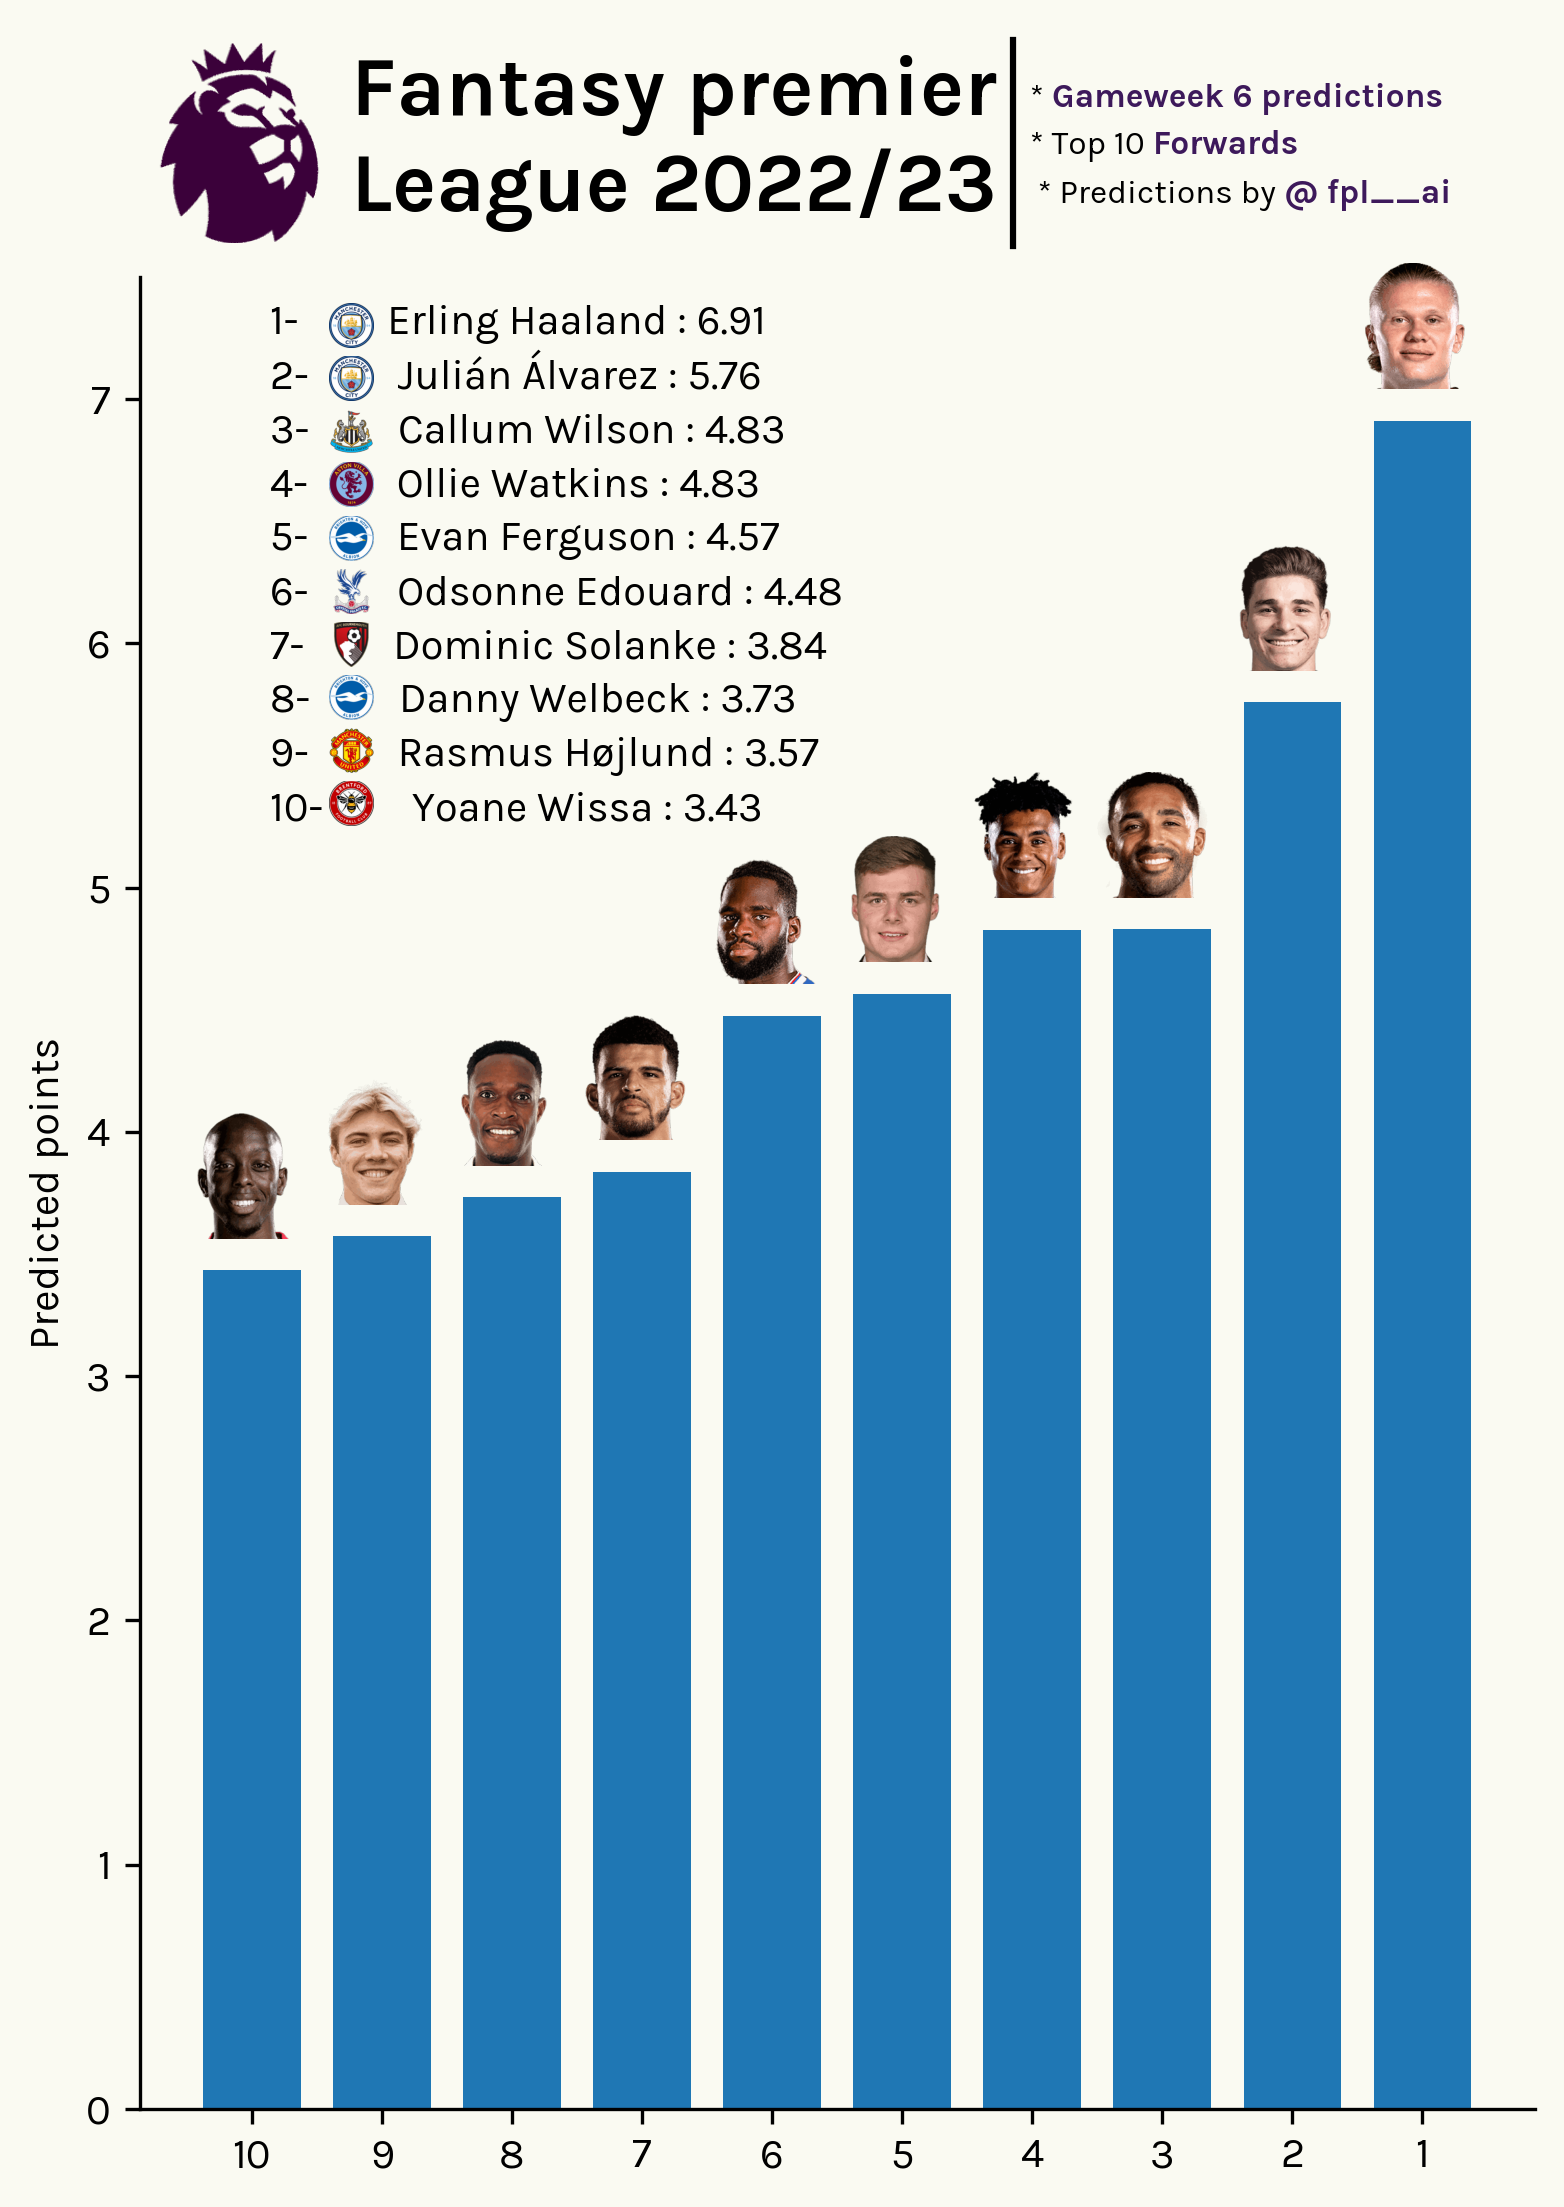

In [ ]:
color="#fafaf2"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width)
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,7.5)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    try:
      player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))
    except HTTPError:
      player_icon = Image.open(urllib.request.urlopen("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png"))
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Forwards> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.06,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029

## Midfielders

In [ ]:
df=pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/midfielders_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

In [ ]:
df

,level_0,index,name,team,points,value
0,16,Bruno Borges Fernandes2023-09-23T19:00:00Z,Bruno Borges Fernandes,Man Utd,4.783327,84
1,72,Kaoru Mitoma2023-09-24T13:00:00Z,Kaoru Mitoma,Brighton,4.859419,65
2,88,Martin Ødegaard2023-09-24T13:00:00Z,Martin Ødegaard,Arsenal,4.878220,85
3,104,Pascal Groß2023-09-24T13:00:00Z,Pascal Groß,Brighton,4.983465,63
4,119,Solly March2023-09-24T13:00:00Z,Solly March,Brighton,5.053950,66
5,107,Phil Foden2023-09-23T14:00:00Z,Phil Foden,Man City,5.061370,76
6,109,Raheem Sterling2023-09-24T13:00:00Z,Raheem Sterling,Chelsea,5.148017,72
7,18,Bryan Mbeumo2023-09-23T16:30:00Z,Bryan Mbeumo,Brentford,5.529751,69
8,85,Marcus Rashford2023-09-23T19:00:00Z,Marcus Rashford,Man Utd,5.595857,89
9,94,Mohamed Salah2023-09-24T13:00:00Z,Mohamed Salah,Liverpool,6.624086,125


<ipython-input-18-b88dfc0524c2>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


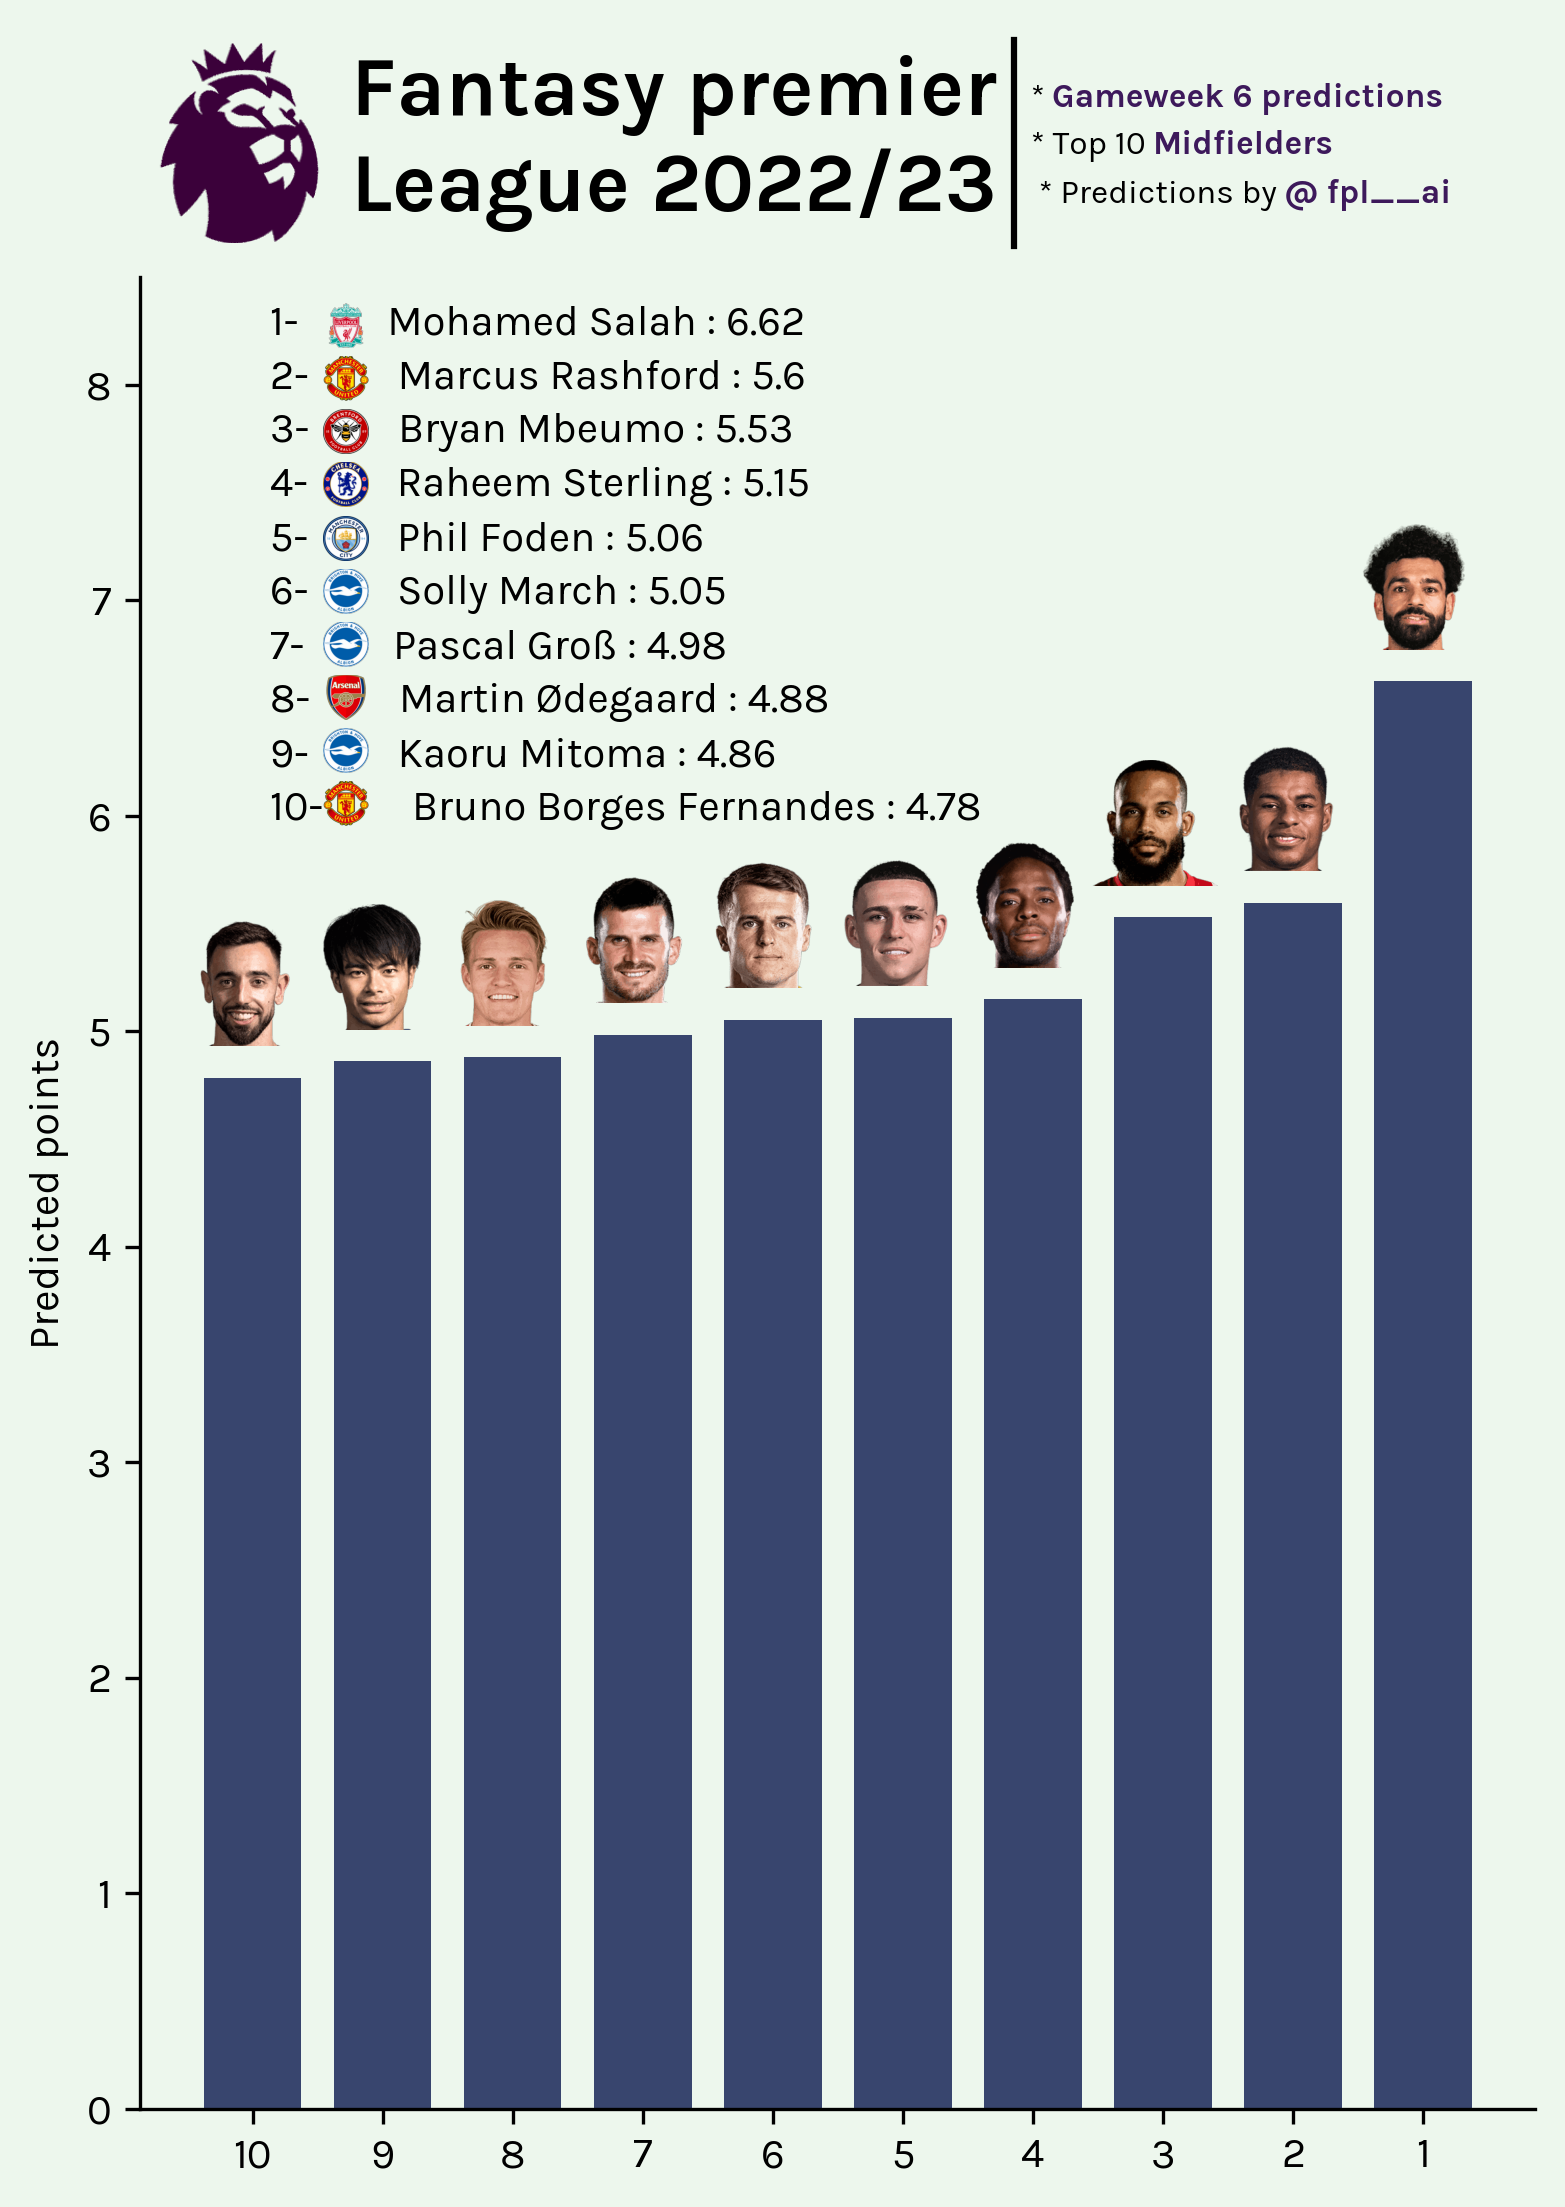

In [ ]:
color="#edf7ed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,8.5)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    try:
      player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))
    except HTTPError:
      player_icon = Image.open(urllib.request.urlopen("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png"))
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Midfielders> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.055,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029

## Defenders

In [ ]:
df=pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/defenders_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

#prin

In [ ]:
df

,level_0,index,name,team,points,value
0,11,Craig Dawson2023-09-23T14:00:00Z,Craig Dawson,Wolves,3.644225,45
1,47,Lisandro Martínez2023-09-23T19:00:00Z,Lisandro Martínez,Man Utd,3.746617,48
2,57,Max Kilman2023-09-23T14:00:00Z,Max Kilman,Wolves,3.821824,45
3,62,Nélson Cabral Semedo2023-09-23T14:00:00Z,Nélson Cabral Semedo,Wolves,3.862212,45
4,33,Joachim Andersen2023-09-23T14:00:00Z,Joachim Andersen,Crystal Palace,3.865418,46
5,3,Andrew Robertson2023-09-24T13:00:00Z,Andrew Robertson,Liverpool,3.871834,65
6,80,Tyrick Mitchell2023-09-23T14:00:00Z,Tyrick Mitchell,Crystal Palace,3.905006,45
7,36,Joel Matip2023-09-24T13:00:00Z,Joel Matip,Liverpool,3.933437,49
8,42,Kieran Trippier2023-09-24T15:30:00Z,Kieran Trippier,Newcastle,4.465950,65
9,79,Trent Alexander-Arnold2023-09-24T13:00:00Z,Trent Alexander-Arnold,Liverpool,4.910123,79


<ipython-input-22-36ddadbf0821>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


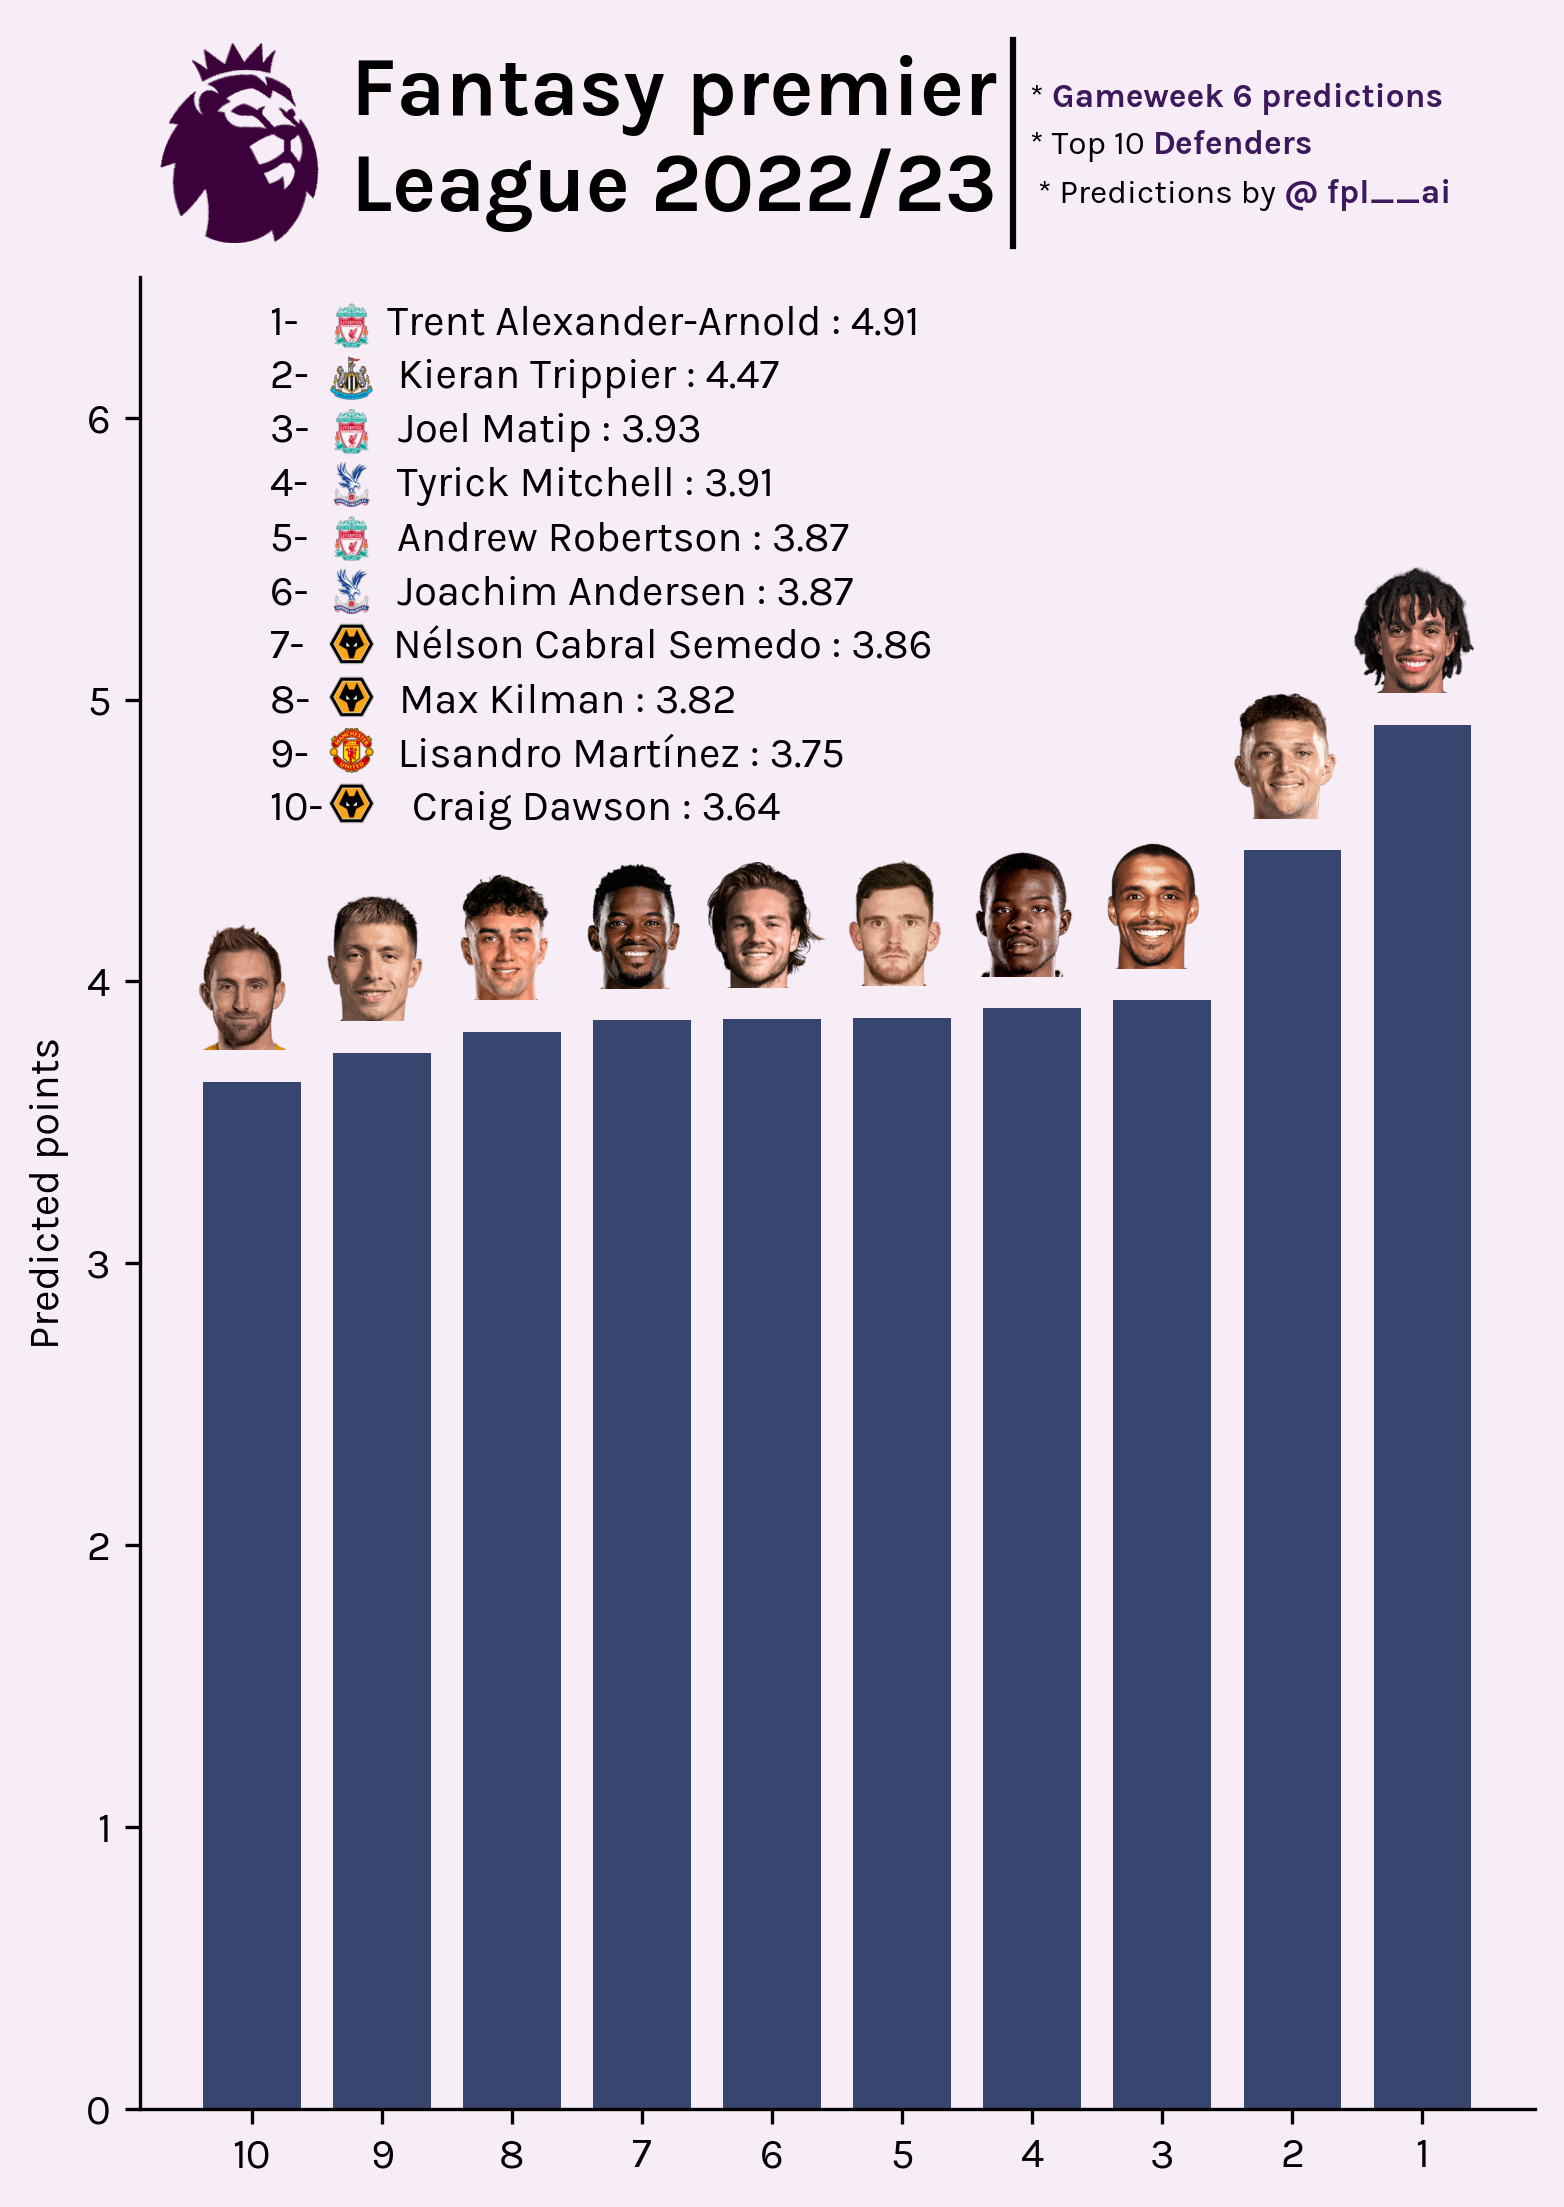

In [ ]:
color="#f7edf7"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,6.5)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    try:
      player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))
    except HTTPError:
      player_icon = Image.open(urllib.request.urlopen("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png"))
    #.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Defenders> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.06,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029

## Goalkeepers

In [ ]:
df=pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/goalkeepers_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(6).reset_index()

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

#prin

In [ ]:
df

,level_0,index,name,team,points,value
0,1,Alisson Ramses Becker2023-09-24T13:00:00Z,Alisson Ramses Becker,Liverpool,3.222486,55
1,16,Nick Pope2023-09-24T15:30:00Z,Nick Pope,Newcastle,3.385372,55
2,5,Bernd Leno2023-09-23T14:00:00Z,Bernd Leno,Fulham,3.413526,46
3,13,José Malheiro de Sá2023-09-23T14:00:00Z,José Malheiro de Sá,Wolves,3.541963,50
4,6,David Raya Martin2023-09-24T13:00:00Z,David Raya Martin,Arsenal,3.793116,48
5,3,André Onana2023-09-23T19:00:00Z,André Onana,Man Utd,3.863871,50


In [ ]:
df=df.head(6)

<ipython-input-27-761fbfab1fc0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(5,-1,-1)])


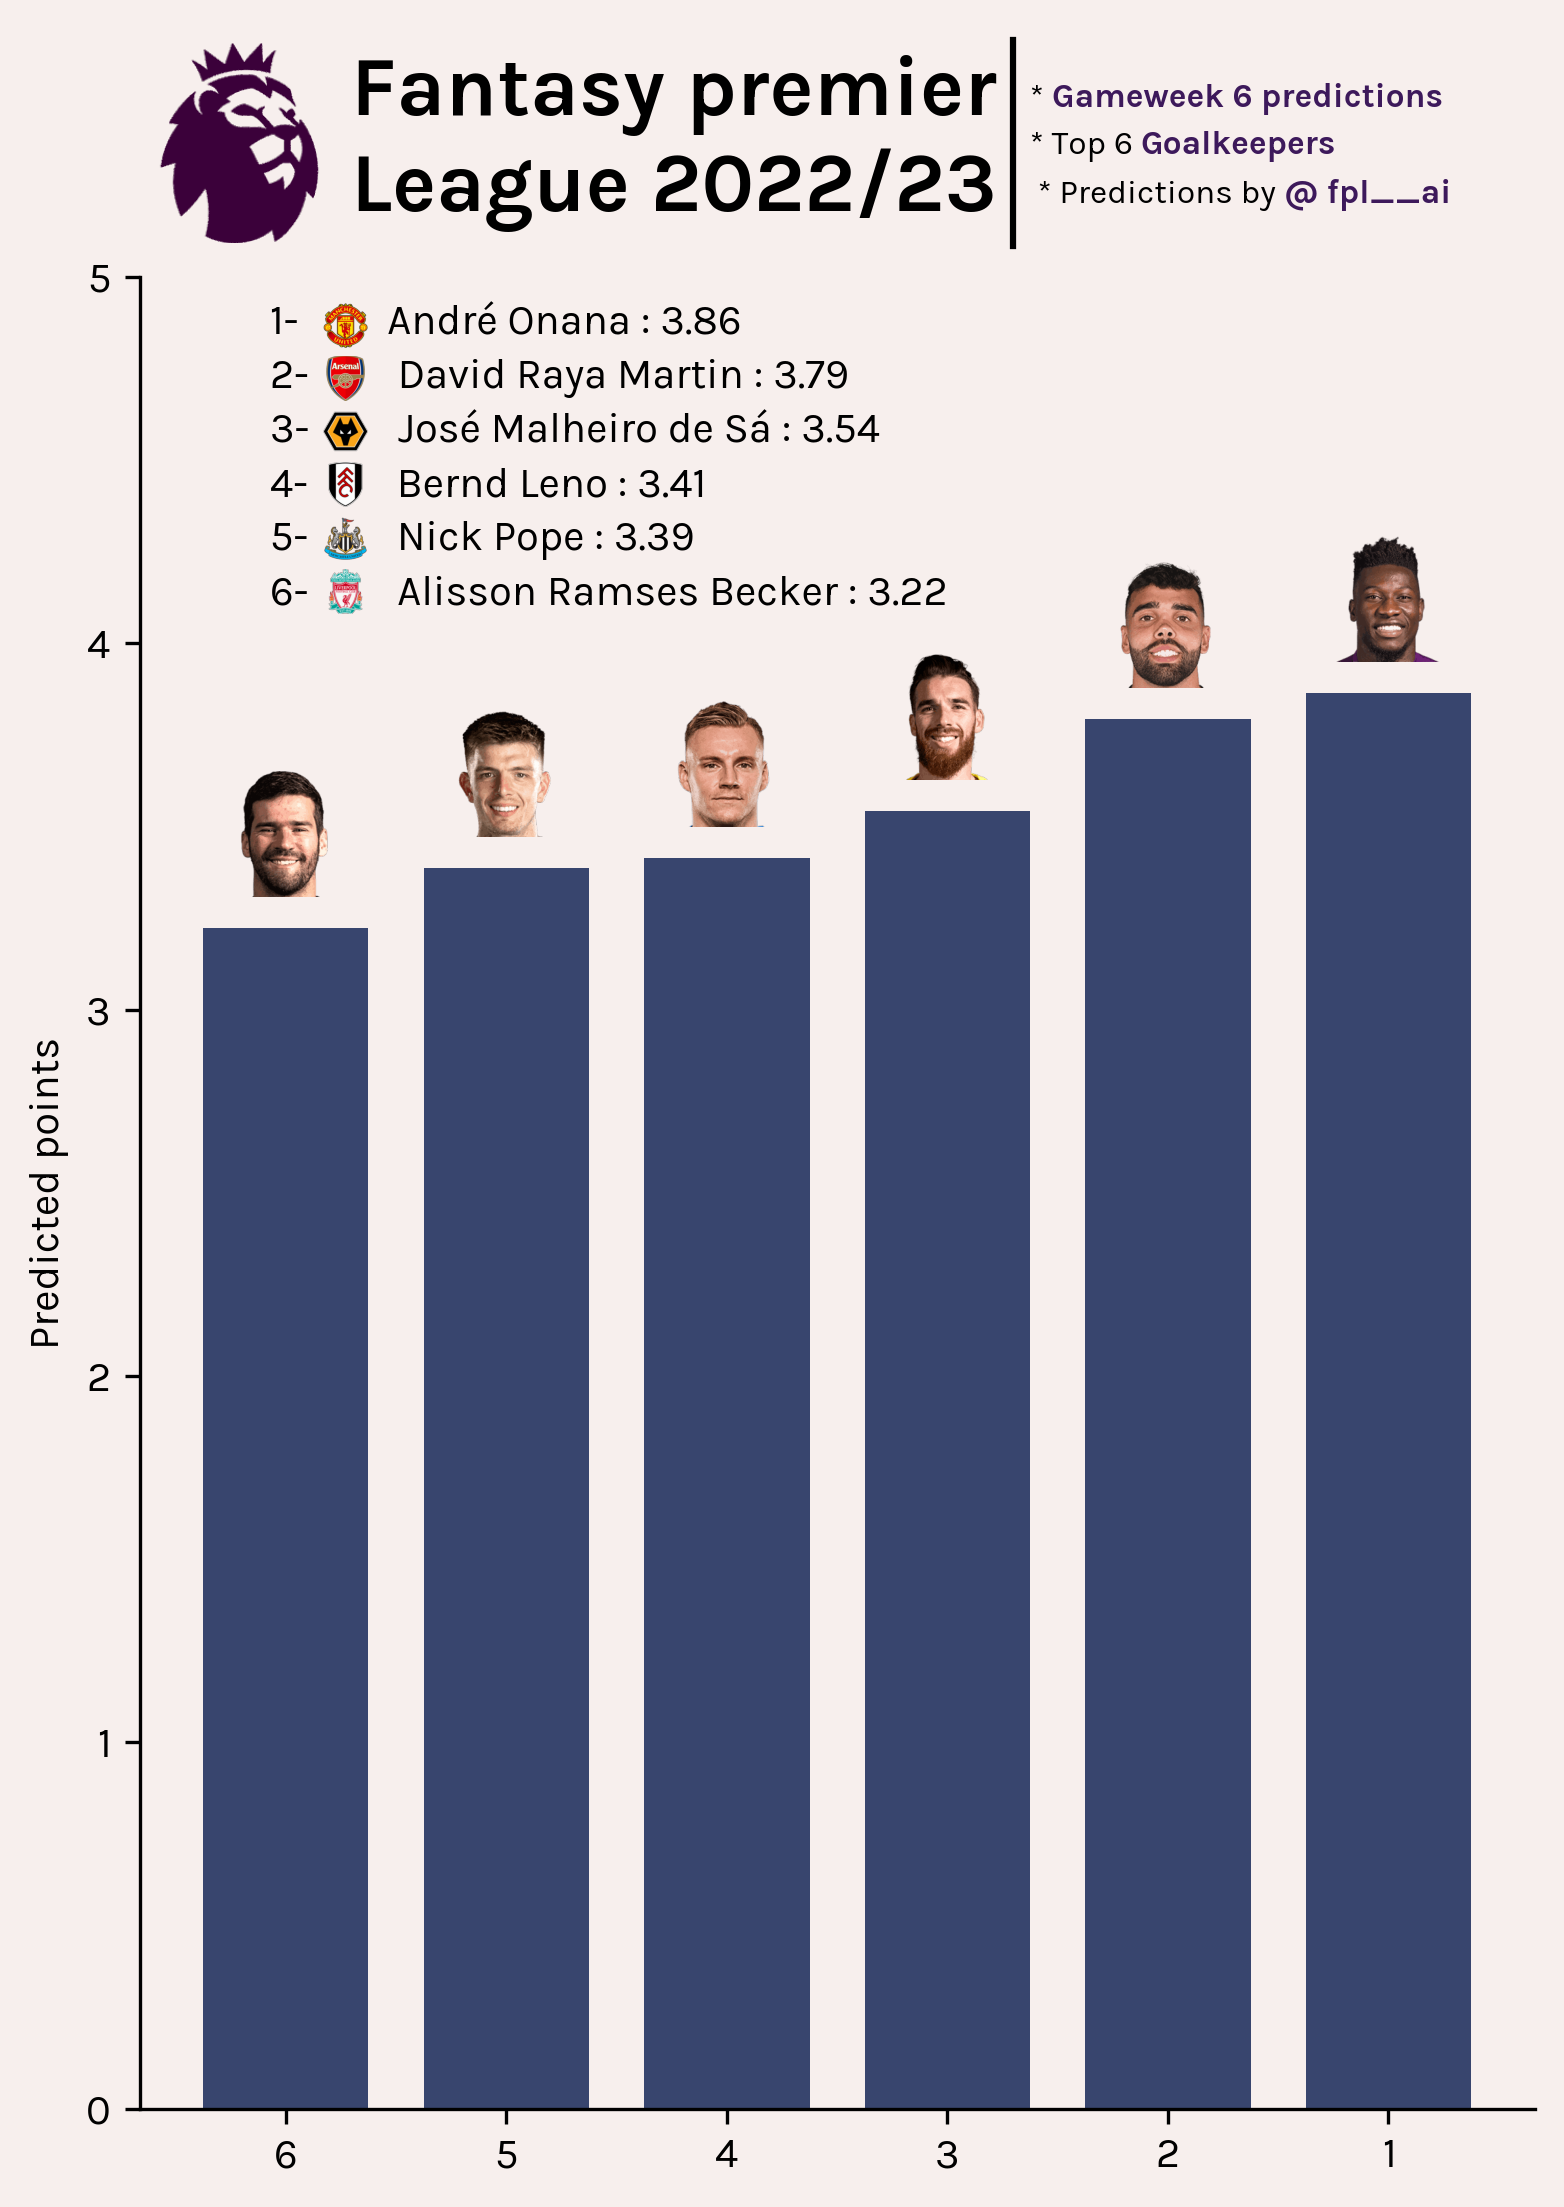

In [ ]:
color="#f7efed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(5,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,5)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/2.5, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    try:
      player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))
    except HTTPError:
      player_icon = Image.open(urllib.request.urlopen("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png"))
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 6 <Goalkeepers> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.03,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029

## Captain pick

In [ ]:
predicted_fwds = pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/forwards_points.csv",index_col=0)
predicted_defs = pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/defenders_points.csv",index_col=0)
predicted_mids = pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/midfielders_points.csv",index_col=0)
predicted_gks = pd.read_csv(f"/content/drive/MyDrive/Fplpredict /predicted_dataset/GW{gameweek}/goalkeepers_points.csv",index_col=0)
data=pd.concat([predicted_fwds,predicted_defs,predicted_mids,predicted_gks])

In [ ]:
data=data.sort_values(by="points",ascending=True).tail(10)

In [ ]:
layout = [["heading"]*6+["line"]+["subheading"]*6,
          ["heading"]*6+["line"]+["subheading"]*6,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,]

4.910123382427794
4.983464759233072
5.053950296513762
5.061369745737955
5.148016800148069
5.529750510476806
5.59585747807343
5.758382885220479
6.624085930012108
6.910106468872288


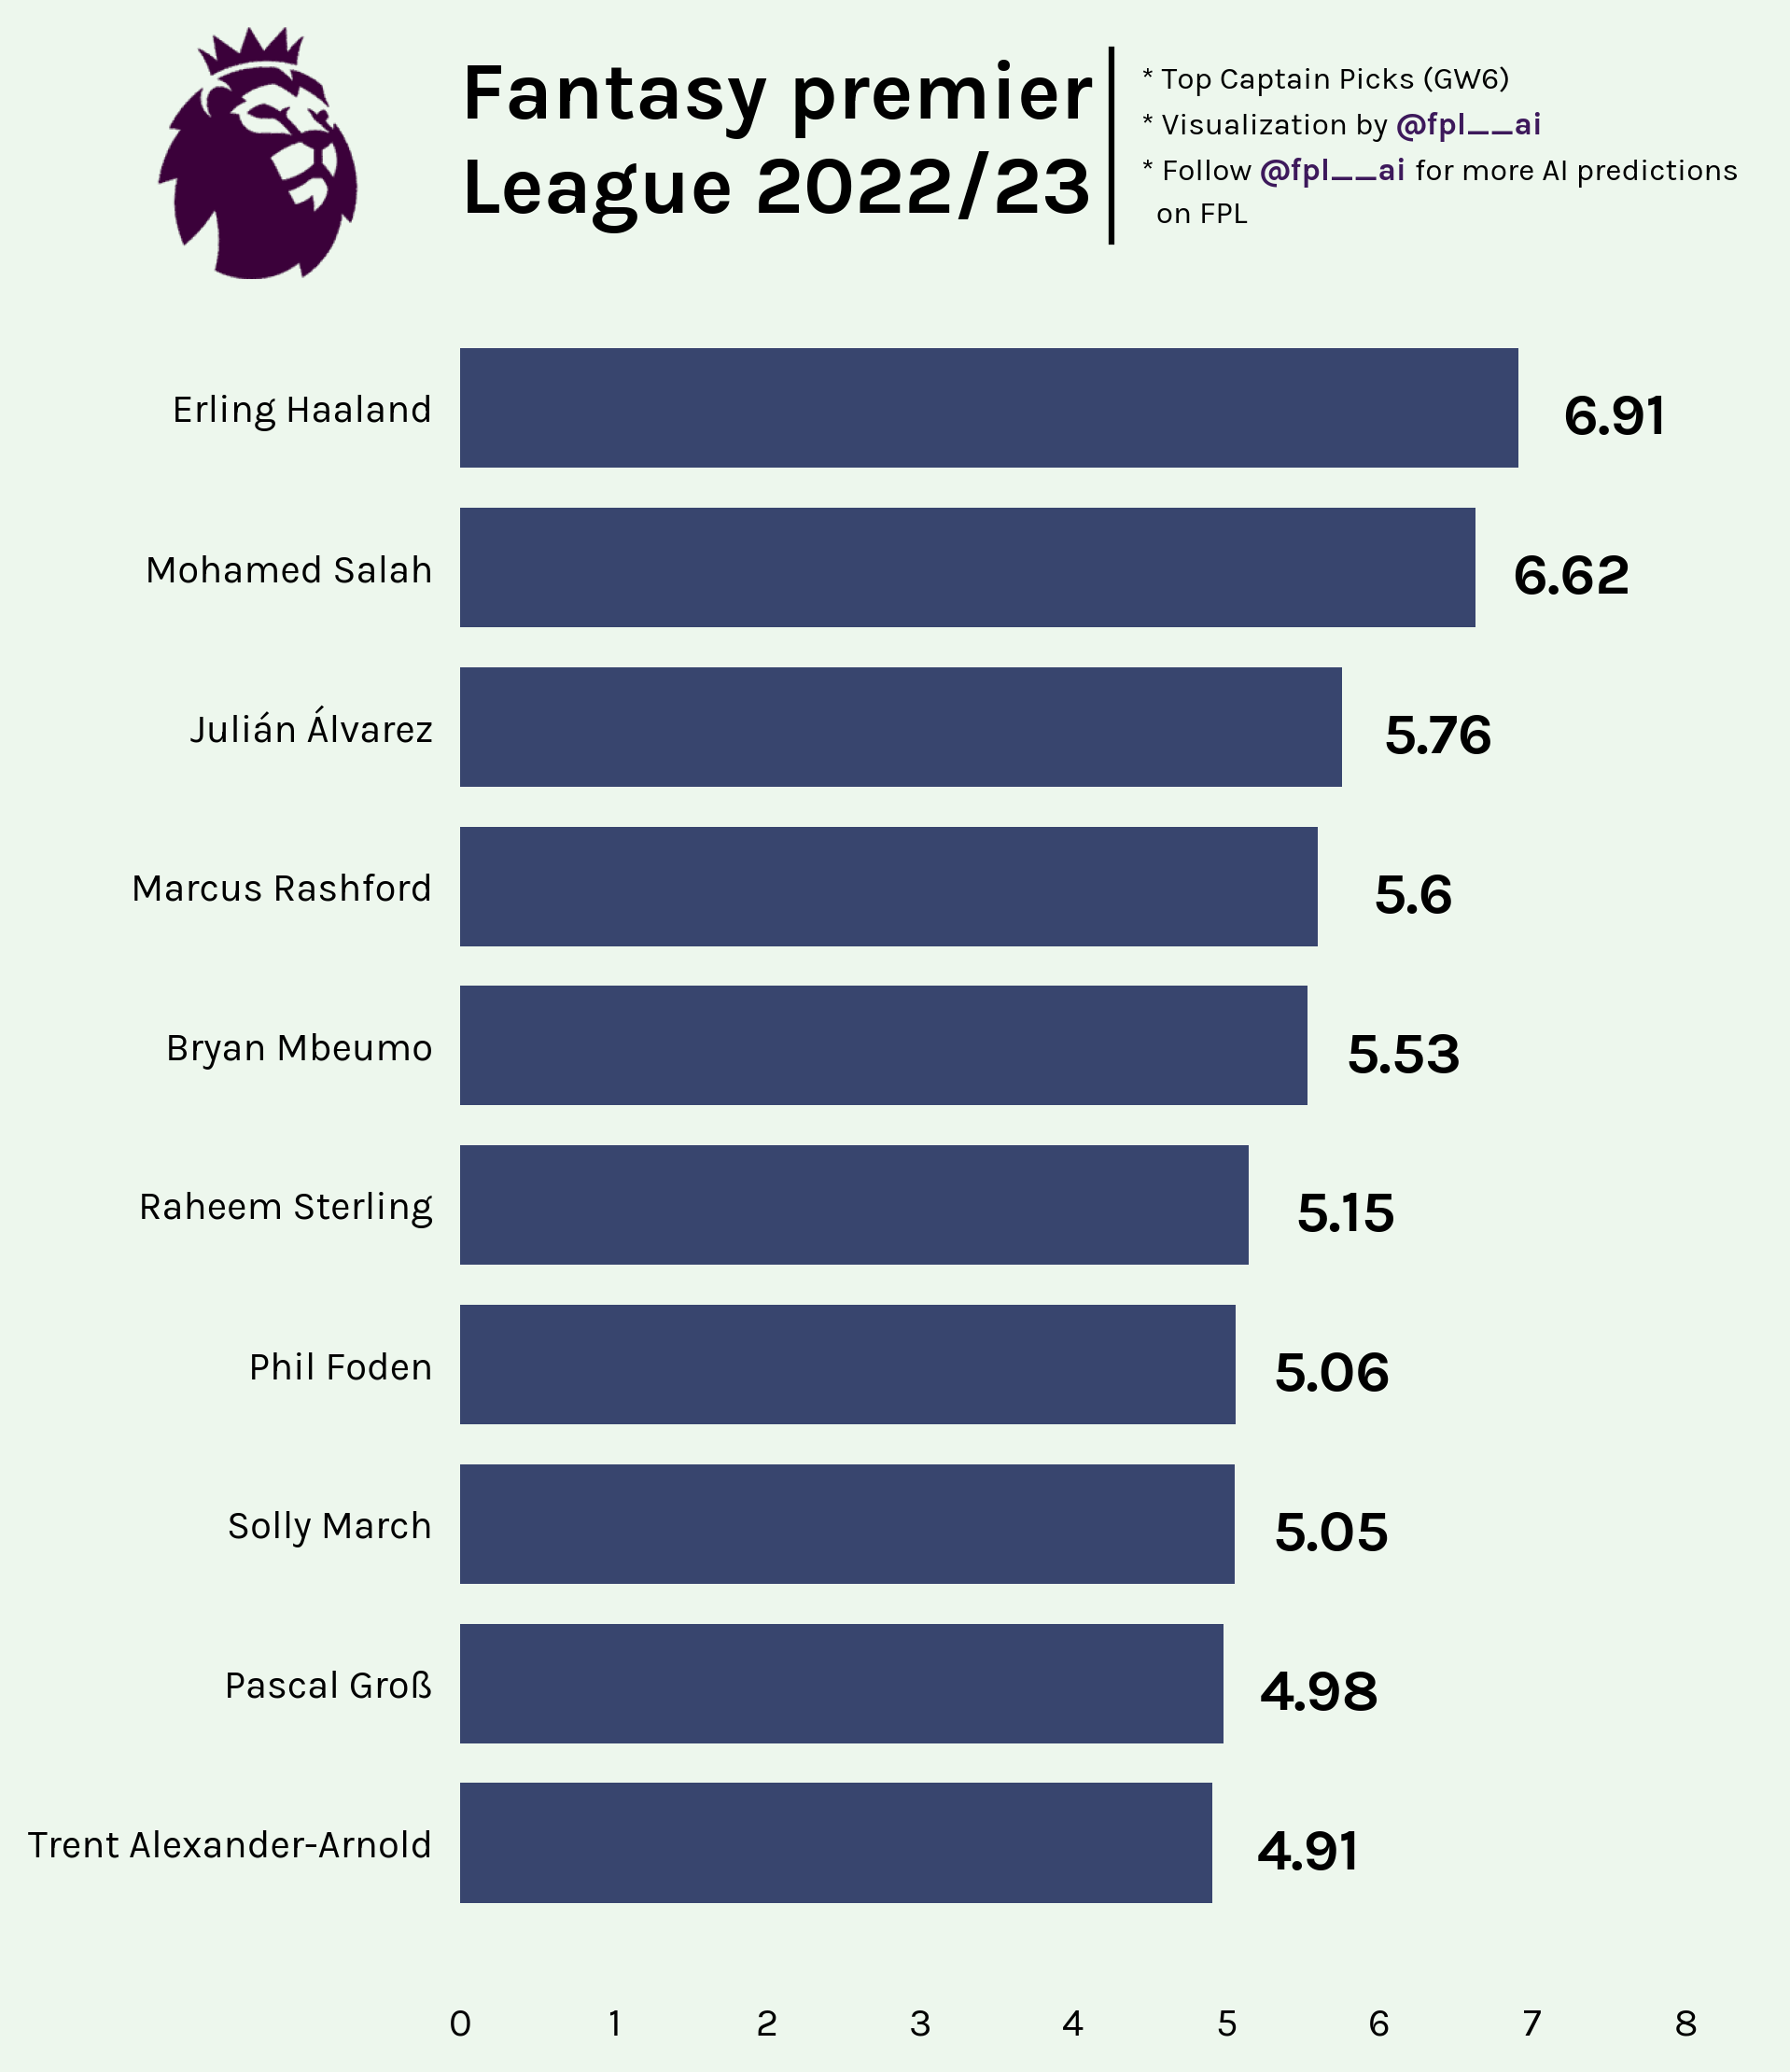

In [ ]:
color="#edf7ed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)


# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.75

# Fouls conceded
ax_dict["bar"].barh(
    data["name"],
    data["points"],
    height=height,
    color="#38456e"
    )
ax_dict["bar"].spines["top"].set(visible = False)
ax_dict["bar"].spines["bottom"].set(visible = False)
ax_dict["bar"].spines["left"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)

ax_dict["bar"].xaxis.set_ticks_position('none')
ax_dict["bar"].yaxis.set_ticks_position('none')
# Remove spines
ax_dict["bar"].set_xlim(0,8.5)
ax_dict["bar"].set_facecolor(color)


#Annotate
for index, point in enumerate(data["points"]):
    print(point)
    ax_dict["bar"].annotate(
        xy = (point+0.5, index-0.25),
        text = f"{round(point,2)}",
        xytext = (5, 7),
        size = 15,
        textcoords = "offset points",
        color = "black",
        ha = "center",
        va = "center",
        weight = "bold"
    )

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([-0.07, 0.76, 0.15, 0.15])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#Title
ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")
ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 21, color="#000000"
)


ax_dict["line"].plot([0.5,0.5],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.1,
    s = f"* Top Captain Picks (GW{gameweek})\n* Visualization by <@fpl__ai>\n* Follow <@fpl__ai> for more AI predictions \n  on FPL",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)